In [3]:
import ccxt
from exchange import Exchange
from record import Record
import datetime as dt
import json
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib as ta


%matplotlib inline
pd.set_option('display.max_columns', 100)


ex =Exchange()
rec= Record()
sub_account = ex.sub_account
exchange=ex.exchange
token_name = 'XRP'
pair = token_name +'/USD'
# ex.fetch_tickers()
print(exchange.headers)
# '2021-03-23T19:00:00Z'
start_date = dt.datetime.now() - dt.timedelta(days=365)
end_date = dt.date.today()
since_trade = dt.datetime.now() - dt.timedelta(days=30) ### Last 5 days
since_str = since_trade.strftime('%Y-%m-%d')
timestamp = since_trade.timestamp()*1000

{'FTX-SUBACCOUNT': 'main_farm'}


In [2]:
# def read_config():
#     with open('config.json','r') as json_file:
#         return json.load(json_file)
# def write_config(json_obj):
#     with open('config.json','w') as json_file:
#         return json.dump(json_obj,json_file)   

# json_file =read_config()
# print(json_file)

# # json_file['threshold_buy'] = [0.03,0.07,0.05,0.02]
# # write_config(json_file)

In [ ]:
## edit file
def edit_config():
    json_file =read_config()
    for key,values in json_file.items():
        print(key , values)
    print('#'*50)
    edit_name = str(input('Config name to edit >>> '))
    # edit_json = json_file[edit_name]
    print(json_file[edit_name])


    if edit_name == 'cd':
        edit_values = int(input('Values to Edit [int]: '))
        json_file[edit_name] = edit_values
        write_config(json_file)
        print(f'Complete Edit {edit_name}: {edit_values}')

In [ ]:
# with open('config.json') as json_file:
#     jsona= json.load(json_file)

In [ ]:
    def checkDB(pair):
        pairx = pair.split('/')[0]

        try:
            tradinglog = pd.read_csv(f"{Exchange().sub_account}_{pairx}.csv")
            print('DataBase Exist Loading DataBase....')
        except:
            tradinglog = pd.DataFrame(
                columns=['id', 'timestamp', 'datetime', 'symbol', 'side', 'price', 'amount', 'cost', 'fee'])
            tradinglog.to_csv(f"{Exchange().sub_account}_{pairx}.csv", index=False)
            print("Database Created")
        return tradinglog


    def update_trade_log( pair):
        pair = pair
        pairx = pair.split('/')[0]
        ### Read DB
        tradinglog = pd.read_csv(f"{Exchange().sub_account}_{'SOL'}.csv")
        ### Fetch order 
        trade_history = last_transcation(pair) #symbols
        tradinglogg= pd.concat([tradinglog,trade_history],ignore_index=True)
        tradinglogg['id']=tradinglogg['id'].astype('int32') ### Convert id to int
        tradinglogg=tradinglogg.drop_duplicates( 'id')
        tradinglogg.to_csv(f"{Exchange().sub_account}_{'SOL'}.csv", index=False)
            
            
    
    def get_last_id( pair):
        pair = pair
        trade_history = last_transcation(pair)
        last_trade_id = (trade_history.iloc[:10]['id'])

        return last_trade_id
    


In [ ]:
# checkDB('SOL/USD')
# df =pd.read_csv(f"{Exchange().sub_account}_{'SOL'}.csv")
# pair= 'SOL/USD'


In [4]:
# symbol_list = jsona['symbols']
# symbol_list
stop_target = [0.3,0.1,0.5,0.2]
entry_list =[1.1,30.0,5.0,0.000019]

symbol_list = ['XRP', 'SOL', 'SRM', 'XRPBEAR']

def entry_port(entry_list):
    try:
        aa = pd.DataFrame()
        aa['symbol'] = np.array(symbol_list)
        price_list = []

        for symbol in symbol_list:
            price =  ex.get_price(symbol+'/USD')
            price_list.append(price)
            aa['price'] =0.0
            aa['entry'] = 0.0

        aa['price'] = price_list
        aa['stop'] = aa['price']-(stop_target* aa['price'])
        aa['tp'] =aa['price']+(stop_target* aa['price'])

        aa['entry'] =entry_list
        # aa.set_index('symbol',inplace=True)
        aa.to_csv('entry_price_log.csv')
    except Exception as e:
        print(str(e))

def check_pnl(token_name):
    first_entry={}
    price ={}
    try:
        equity_db= pd.read_csv('entry_price_log.csv')
        first_entry[token_name] = equity_db[equity_db['symbol']==token_name]['entry'][0]
        price[token_name] = equity_db[equity_db['symbol'] ==token_name]['price'][0]
        diff = (price[token_name] - first_entry[token_name])
        return first_entry
    except:
        symbols = token_name +'/USD'
        first_entry[token_name]= Exchange().get_price(symbols)
        print('**** None Database *** ')
        return  first_entry

def get_price(token_name):
    price = exchange.fetch_ticker(token_name)['last']
    return float(price)


# rec.get_trade_history('XRP/USD',,last_transaction=500) ###((exhange.milliseconds() - 144000000)
def last_transcation(pair,sincee =timestamp,limitt=100):
    transcation = pd.DataFrame(exchange.fetchMyTrades(pair, since=sincee,limit=limitt),
                    columns=['id', 'timestamp', 'datetime', 'symbol', 'side', 'price', 'amount','cost','fee'])
    transcations = []
    for i in range(len(transcation)):
            transcations.append((transcation['fee'][i]['cost']))  # ใน fee เอาแค่ cost
    transcation['fee'] = transcations
    return transcation

#     print(i)
# str(exchange.milliseconds() - 1440000)
    
for symbol in symbol_list:
    price =  ex.get_price(symbol+'/USD')
    print(symbol,price)

    

XRP 1.4429
SOL 49.6125
SRM 8.038
XRPBEAR 3.4e-06


In [ ]:
### filen from record.py
filen= f'log\Equity_{sub_account}.csv'

df = pd.read_csv(filen)
df['date']= pd.to_datetime(df['date'])
df.set_index('date',inplace=True)

df_resample =df.resample('15T').mean().fillna(method = 'ffill')
df_resample.tail()

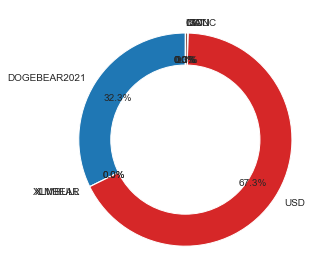

In [10]:
wallet = ex.get_wallet()
wallet_df = pd.DataFrame(wallet)

df1 = wallet_df[['coin', 'usdValue']]

pie_chart(df1['usdValue'],df1['coin'],donut=True)
# # df_resample['Equity'].plot()
# plt.title('Portfolio')
# plt.show()
# print(df1)
# https://medium.com/analytics-vidhya/how-to-get-started-with-stock-performance-analysis-in-python-53378e3b8d74

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


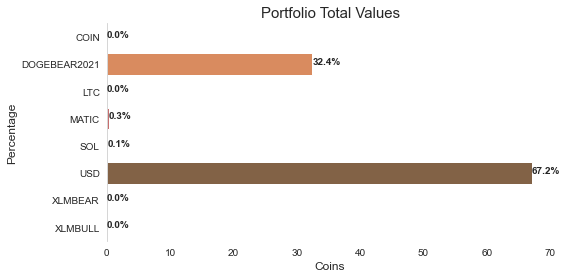

In [11]:
def pie_chart(values,label,donut=False):
    # plt.show()
    fig1, ax1 = plt.subplots()
    ax1.pie(values,labels = label,shadow=False, startangle=90, pctdistance=0.75,autopct= '%1.1f%%')
    # ax1.axis('equal')
    plt.tight_layout()
    if donut ==True:
        centre_circle = plt.Circle((0, 0), 0.70, fc='white')
        fig = plt.gcf()
        fig.gca().add_artist(centre_circle)
    # plt.pie(wallet_data['usdValue'], labels  = wallet_data['coin'])
    plt.show()

    #Seaborn Horizontal barplot 
# https://www.dataforeverybody.com/matplotlib-seaborn-pie-charts/
def plot_bar():
    wallet = ex.get_wallet()
    wallet_df = pd.DataFrame(wallet)
    df1 = wallet_df[['coin', 'usdValue']]
    df1['usdValue'] = df1['usdValue'].astype('float')
    df_percent = df1.groupby('coin').agg(percentage = ('usdValue', lambda p: p.sum() / df1['usdValue'].sum() * 100) ).round(2)
    sns.set_style("whitegrid")
    bar,ax = plt.subplots(figsize=(8,4))
    ax = sns.barplot(x="percentage", y=df_percent.index, data=df_percent, ci=None, palette="muted",orient='h' ) #swap x ,y 
    ax.set_title("Portfolio Total Values", fontsize=15)
    ax.set_xlabel ("Coins",fontsize=12)
    ax.set_ylabel ("Percentage",fontsize=12)
    ax.grid(False)
    sns.despine(bottom = True, left = False)

    for rect in ax.patches:
        ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )
    # bar.savefig("Seaborn_Bar_Vertical.png");
    plt.show()
    return    df_percent




def rebalance_plan(starts,gap,zone =0.5 ,fix_values=1000 , start_cash=1000):
    gap_p = starts  * gap
    bh= fix_values +start_cash
    a=np.arange(starts,(zone*starts),-gap_p)
    b=np.arange(starts,((1+zone)*starts),gap_p)
    c=np.concatenate((a, b),axis=None)
    dd = pd.DataFrame(c,columns=['price'])
    dd.drop_duplicates(inplace=True)
    dd.sort_values('price',ascending=False,inplace=True)
    dd['diff']  = (dd['price']-starts)/starts
    # start_equity = 10000
#     fix_values =1000
#     start_cash = 1000
    dd['values'] = (dd['diff'] * fix_values)+fix_values

    dd['cash_values'] = (dd['diff'] * start_cash)+start_cash

    dd['unit']= fix_values/dd['price']


    port_value =dd['unit']*dd['price']
    dd['equity']=(port_value + dd['cash_values'])
    dd['equity_bh'] =  bh+ (bh*dd['diff']) 
    dd['cf']=(dd['diff'] * fix_values)
    
    return dd

df_percent= plot_bar()


In [ ]:

starts = 40
gap = starts  * 0.02
zone = 0.50 ### range 0.1- 1.0

dd= rebalance_plan(45,0.02,0.5,start_cash= 10000)
dd.set_index('diff',inplace=True)
# dd

In [ ]:

def calc_MDD(networth):
  df = pd.Series(networth, name="nw").to_frame()

  max_peaks_idx = df.nw.expanding(min_periods=1).apply(lambda x: x.argmax()).fillna(0).astype(int)
  df['max_peaks_idx'] = pd.Series(max_peaks_idx).to_frame()

  nw_peaks = pd.Series(df.nw.iloc[max_peaks_idx.values].values, index=df.nw.index)

  df['dd'] = ((df.nw-nw_peaks)/nw_peaks)
  df['mdd'] = df.groupby('max_peaks_idx').dd.apply(lambda x: x.expanding(min_periods=1).apply(lambda y: y.min())).fillna('ffill')

  return df


In [ ]:
cf_mean =df_resample['Equity'].pct_change().mean()
ann_ret = (df_resample['Equity'].pct_change().mean()) *np.sqrt(252)

In [ ]:
df_resample['Exposure_ALL'].plot()

In [ ]:
dd_df =calc_MDD(df_resample['Equity'])
dd_df[['dd','mdd']].plot()
dd_df.tail()

In [ ]:
df_resample.tail()

In [ ]:
since_trade = dt.datetime.now() - dt.timedelta(days=10)
since_str = end_date.strftime('%Y-%m-%d')
ts_stamp  = since_trade.timestamp()*1000

In [ ]:
pair= 'LTC/USD'
ad = last_transcation(pair,limitt=100)
ad

In [ ]:
def avg_price(df):
    df.sort_values(['timestamp','symbol','side'], ascending=[True,True, True], inplace=True)
    df['usd_value'] = df['amount'] * df['price']
    df['adj_amount'] = df.apply(lambda x: ((x.side == "buy") - (x.side == "sell")) * x['amount'], axis = 1)
    df['adj_amount'] = df.groupby('symbol')['adj_amount'].cumsum()
    df['adj_price'] = df.apply(lambda x: ((x.side == "buy") - (x.side == "sell")) * x['usd_value'], axis = 1)
    df['adj_price'] = df.groupby('symbol')['adj_price'].cumsum().div(df['adj_amount'])
    return df

def Roc(df,shift=7):
    
    df['diff_7'] = df['close'].shift(shift)
    df['roc_7']  = (df['close'] / df['diff_7'] -1) *100
    
    return df['roc_7'].iloc[-1],df['close'].shift(shift).iloc[-1] ### roc_7 , close[-7]

def volatility(df,windows=30):
    
    log_ret = np.log(df['close'] / df['close'].shift(1))
  # Compute Volatility using the pandas rolling standard deviation function
  # return pd.rolling_std(log_ret, window=252) * np.sqrt(252)
    volatilitys =  log_ret.rolling(window=windows).std() * np.sqrt(windows)
    return volatilitys

def get_data(symbol) :
    df = pd.DataFrame(exchange.fetch_ohlcv(symbol,timeframe=timeframes, since=start_ts),columns=['date','open','high','low','close','volume'])
    df['date'] = pd.to_datetime(df['date'],unit='ms')
    df.set_index('date',inplace=True)
    return df

def anlysis(dataframe,hurst_on=False):
    try:
        df =dataframe
        up, mid, low = ta.BBANDS(df['close'], timeperiod=50, nbdevup=2, nbdevdn=2, matype=0)
        #   df['chg'] =df.close - df.close.shift(1)
        df['hhv'] = df['high'].rolling(50).max().shift(1)
        df['llv'] = df['low'].rolling(50).max().shift(1)
        df['atr'] = ta.ATR(df['high'],df['low'],df['close'],timeperiod= 10)
        df['rsi']= ta.RSI(df['close'],timeperiod=10)
        df['p_atr'] = round(df['atr'] /df['close']*100,3)
        df['log_ret'] =  np.log(df.close) - np.log(df.close.shift(1))
        df['win']= np.sign(df['log_ret'])
        blocks = df['win'].ne(df['win'].shift()).cumsum()
        df['consecutive WL'] = df['win'].groupby(blocks).cumsum()

        if hurst_on == True :
          df['hurst']=0
          for i in range(120,len(df)):
            df.iloc[i,df.columns.get_loc('hurst')]=compute_Hc(df['close'].iloc[i-120:i-1], kind='price')[0] ### list and  add to data
          # df.dropna(inplace=True)
  # #         print(df.tail(5))
          return df
        else:
          return df
    except Exception as e:
        print(str(e))

trade_history= avg_price(ad)
avg_buy_price =trade_history['adj_price'][-1:]
avg_buy_price = float(avg_buy_price.values)
trade_history.append({'adj_amount':18.13},ignore_index=True)

In [ ]:
from hurst import compute_Hc
df= get_data('SOL/USD')
df['ann_volatilty']=volatility(df)
df = anlysis(df,True)
# low_of_52week = round(min(df["low"][-50:]), 2)
df
# Roc(df)

In [ ]:
timeframes ='1d'

start_date = dt.datetime.now() - dt.timedelta(days=252)
start_ts = start_date.timestamp()*1000
end_date = dt.date.today()
token_name  = ['SOL','MATIC','XLMBULL','COIN'] ### tokens name
ddd ={}
ohlc_data ={}
#######################

for token in token_name:
# symbols = token_name+'/USD'
    symbols = token+'/USD'
    price =get_price(symbols)
    wallet = ex.get_wallet()
    wallet = pd.DataFrame(wallet)
    wallet = wallet[wallet['coin']== token]
    wallet['usdValue'] = wallet['usdValue'].astype(float)
    wallet['availableWithoutBorrow'] =wallet['availableWithoutBorrow'].astype(float)
    wallet['price']=wallet['usdValue'] / wallet['availableWithoutBorrow']

    hold_value = round( ex.get_token_value(token),2)
    trade_history = last_transcation(pair= symbols ,limitt=100)# ,formats =since_str
#     trade_history = pd.DataFrame(Exchange().exchange.fetchMyTrades(token+'/USD', limit=100),
#                                          columns=['id', 'timestamp', 'datetime', 'symbol', 'side', 'price', 'amount',
#                                                   'cost',
#                                                   'fee'])
#     cost = []
#     for i in range(len(trade_history)):
#         cost.append((trade_history['fee'][i]['cost']))  # ใน fee เอาแค่ cost
#     trade_history['fee'] = cost



    trade_history.sort_values(['timestamp','symbol','side'], ascending=[True,True, True], inplace=True)
    trade_history['usd_value'] = trade_history['amount'] * trade_history['price']
    trade_history['adj_amount'] = trade_history.apply(lambda x: ((x.side == "buy") - (x.side == "sell")) * x['amount'], axis = 1)
    trade_history['adj_amount'] = trade_history.groupby('symbol')['adj_amount'].cumsum()

    trade_history['adj_price'] = trade_history.apply(lambda x: ((x.side == "buy") - (x.side == "sell")) * x['usd_value'], axis = 1)
    trade_history['adj_price'] = trade_history.groupby('symbol')['adj_price'].cumsum().div(trade_history['adj_amount'])
#### Selected row for first data trades 
    avg_buy_price =trade_history['adj_price'][-1:]
    avg_buy_price = float(avg_buy_price.values)

    df= get_data(symbols)
    ohlc_data[token] =df
    roc_7,close_7 = Roc(df)
    df_buy  = trade_history[trade_history['side'] == 'buy']
    cost_buy= (df_buy['price']*df_buy['amount'] ) .sum()
    sum_amount = df_buy['amount'].sum()
    avg_buy = cost_buy / sum_amount
    buy_cost =df_buy['cost'].sum()



    df_sell  = trade_history[trade_history['side'] == 'sell']
    cost_sell= (df_sell['price']*df_sell['amount'] ) .sum()
    sum_amount_sell = df_sell['amount'].sum()
    if sum_amount_sell > 0.0 :
        avg_sell = cost_sell / sum_amount_sell
    else :
        sum_amount_sell = 0.0
        avg_sell = cost_sell / sum_amount_sell

    sell_cost =df_sell['cost'].sum()
    # diff= sell_cost - buy_cost

    price_now = ex.get_price(symbols)
    unit =hold_value / price_now

    pnl_p = (price_now - avg_buy_price) / avg_buy_price 
    diff  = sell_cost - buy_cost
    real_pnl =  hold_value +diff
    real_pnl_p = (real_pnl) / buy_cost 
    unreal_pnl = (hold_value + sell_cost)  - buy_cost
    unreal_pnl_p = unreal_pnl / buy_cost
#     print(roc_7,close_7)
    # real_pnl =  (hold_value - buy_cost ) +sell_cost
    print(f'{symbols} Sum Buy {buy_cost} : Sum Sell {sell_cost} ')
#     print(f'Hold Value {hold_value}$ AvgBuy {avg_buy_price} : Now {price_now}')
    # print(f'UnrealizePnL {unreal_pnl_p*100}% : {unreal_pnl}$ ')
#     print(f' Cashflow {diff} RealizePnL {real_pnl_p*100}% : {real_pnl}$ ')
    print('#'*50)
    dict_wallet = {'price':price,'unit':unit,'hold_value':hold_value, 'avg_buy':avg_buy_price,'sum_buy':buy_cost,'sum_sell':sell_cost,'cf':diff ,'UnPnL':unreal_pnl,'UnPnl%':unreal_pnl_p,'close_7':close_7,'roc_7':roc_7}
    ddd[token] = dict_wallet

In [ ]:
walllet_list = pd.DataFrame(ddd).T
# walllet_list['diff_avg'] =(walllet_list['price']-walllet_list['avg_buy']) / walllet_list['avg_buy'] ### % diff
# walllet_list['Turnover'] = walllet_list['sum_sell'] / walllet_list['hold_value']
# #entry 6300
# walllet_list['cf'] + walllet_list['hold_value']
# walllet_list['diff_7'][walllet_list.index == 'SOL'] 
walllet_list

In [ ]:
sum_cf=round((walllet_list['sum_sell'].sum() -walllet_list['sum_buy'].sum()) +walllet_list['hold_value'].sum(),3)
entry =6300
sum_cf_p = round(sum_cf  /entry *100,3)
print(f'Cash flow {sum_cf} CashFlow% {sum_cf_p}%')

In [ ]:
df_listings =  df.loc[np.random.permutation(len(df))]
df_listings

In [ ]:
walllet_list.loc[walllet_list.index =='MATIC']

In [ ]:
# (walllet_list.loc[walllet_list.index =='MATIC']['sum_buy'] + walllet_list.loc[walllet_list.index =='MATIC']['sum_sell'] )*0.05

In [ ]:
df['symbols_name']=df['symbol'].str.replace('/USD','')
df

In [ ]:
walllet_list

In [ ]:
token_name  = ['SOL','MATIC','XLMBULL','BTC','ETH','UNI','DOGE']
symbol_lists= ['1INCH/USD','SOL/USD','RAY/USD','SRM/USD','BTC/USD','ETH/USD','XRP/USD','AAVE/USD','UNI/USD','ALPHA/USD','BNB/USD','FTT/USD','LINA/USD','DOGE/USD','BAL/USD','MATIC/USD']
timeframes ='1d'

start_date = dt.datetime.now() - dt.timedelta(days=100)
start_ts = start_date.timestamp()*1000
end_date = dt.date.today()
ddd ={}
for symbol in symbol_lists:
    token =symbol.split('/')[0]
#     symbols = token+ '/USD'
    df = pd.DataFrame(Exchange().exchange.fetch_ohlcv(symbol,timeframe=timeframes, since=start_ts),columns=['date','open','high','low','close','volume'])['close']
    ddd[token] = df

In [ ]:
df1 =pd.DataFrame(ddd)
# df1.pct_change()[-1:].plot(kind='barh')
df1 =df1.pct_change()[-1:]
df1= df1.T
df1.rename(columns= {99:'diff'},inplace=True)
df1

In [ ]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,5))


ax = sns.barplot(x=df1['diff'], y=df1.index, data=df1, ci=None, palette="muted",orient='h' ) #swap x ,y 
ax.set_title("Daily Changes", fontsize=15)
ax.set_xlabel ("Coins",fontsize=12)
ax.set_ylabel ("Percentage",fontsize=12)
ax.grid(False)
sns.despine(bottom = True, left = False)
for rect in ax.patches:
        ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.3f%%"% rect.get_width(), weight='bold' )
    # bar.savefig("Seaborn_Bar_Vertical.png");
plt.show()

In [ ]:
def plot_bar():
    wallet = ex.get_wallet()
    wallet_df = pd.DataFrame(wallet)
    df1 = wallet_df[['coin', 'usdValue']]
    df1['usdValue'] = df1['usdValue'].astype('float')
    df_percent = df1.groupby('coin').agg(percentage = ('usdValue', lambda p: p.sum() / df1['usdValue'].sum() * 100) ).round(2)
    sns.set_style("whitegrid")
    bar,ax = plt.subplots(figsize=(8,4))
    ax = sns.barplot(x="percentage", y=df_percent.index, data=df_percent, ci=None, palette="muted",orient='h' ) #swap x ,y 
    ax.set_title("Portfolio Total Values", fontsize=15)
    ax.set_xlabel ("Coins",fontsize=12)
    ax.set_ylabel ("Percentage",fontsize=12)
    ax.grid(False)
    sns.despine(bottom = True, left = False)

    for rect in ax.patches:
        ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )
    # bar.savefig("Seaborn_Bar_Vertical.png");
    plt.show()
    return    df_percent

In [ ]:
# shuffled_index = np.random.permutation(df.index)
# df.reindex(shuffled_index)

In [ ]:
# df.loc[df.index[0:10],'num'] =1
# df.loc[df.index[10:20],'num'] =2
# df.loc[df.index[20:-1],'num'] =3
# df